In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [52]:
base = '/home/glemieux/data-transfer/ERS_Ld9.f45_g37.IELMFATES.pm-cpu_intel.elm-fates_cold_allvars.20231213_142232_d42qou.elm.h0.0001-01-01-00000.nc.base'
rest = '/home/glemieux/data-transfer/ERS_Ld9.f45_g37.IELMFATES.pm-cpu_intel.elm-fates_cold_allvars.20231213_142232_d42qou.elm.h0.0001-01-01-00000.nc.rest'

In [53]:
ds_base = xr.open_dataset(base)
ds_rest = xr.open_dataset(rest)

In [54]:
stvt_base = ds_base.SOIL2N_TNDNCY_VERT_TRANS
stvt_rest = ds_rest.SOIL2N_TNDNCY_VERT_TRANS
stvt_diff = abs(stvt_base - stvt_rest)

In [55]:
stvt_diff.dims

('time', 'levdcmp', 'lat', 'lon')

In [56]:
len(stvt_diff.time)

10

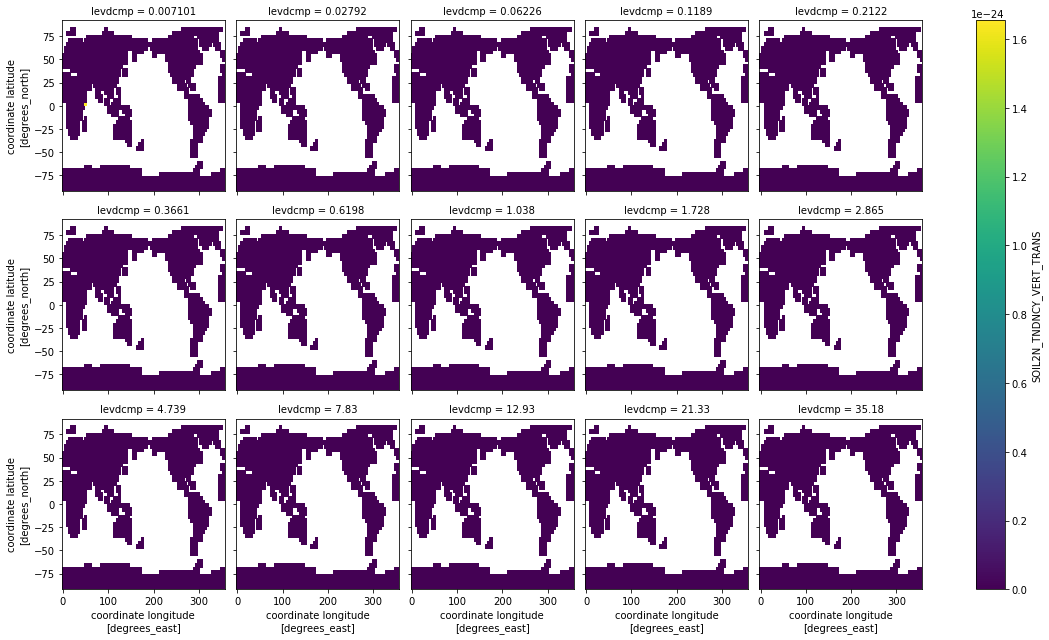

In [57]:
tidx = 9
stvt_diff.isel(time=tidx).plot(x='lon',y='lat',col='levdcmp', col_wrap=5)

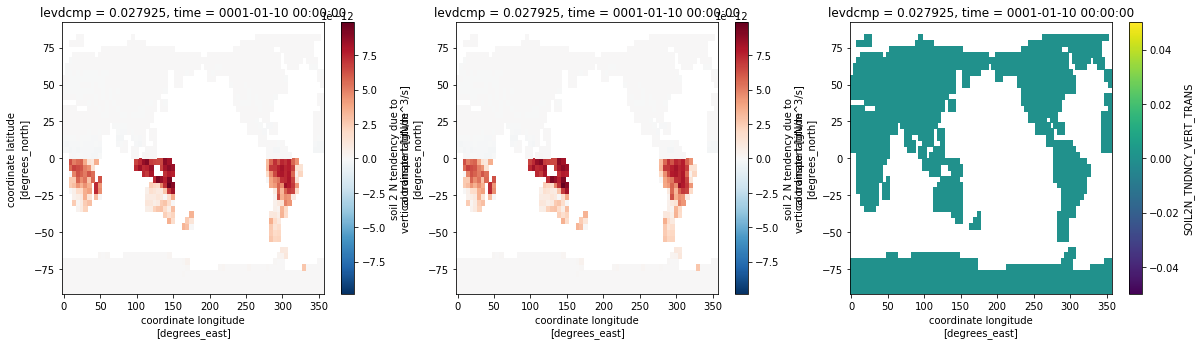

In [58]:
idx_ldcmp = 1
f,ax = plt.subplots(1,3,figsize=(20,5))
stvt_base.isel(time=tidx,levdcmp=idx_ldcmp).plot(ax=ax[0])
stvt_rest.isel(time=tidx,levdcmp=idx_ldcmp).plot(ax=ax[1])
stvt_diff.isel(time=tidx,levdcmp=idx_ldcmp).plot(ax=ax[2])

In [59]:
stvt_diff.isel(lon=11,lat=24,levdcmp=1,time=9).values

array(nan, dtype=float32)

In [113]:
(stvt_diff.to_dataframe().dropna() != 0.).all()

SOIL2N_TNDNCY_VERT_TRANS    False
dtype: bool

In [114]:
(stvt_diff.to_dataframe().dropna() != 0.).any()

SOIL2N_TNDNCY_VERT_TRANS    True
dtype: bool

In [115]:
mask = (stvt_diff.to_dataframe().dropna() != 0.)
print(mask)

                                           SOIL2N_TNDNCY_VERT_TRANS
time                levdcmp   lat   lon                            
0001-01-01 00:00:00 0.007101  -90.0 0.0                       False
                                    5.0                       False
                                    10.0                      False
                                    15.0                      False
                                    20.0                      False
...                                                             ...
0001-01-10 00:00:00 35.177620  82.0 330.0                     False
                                    335.0                     False
                                    340.0                     False
                                    345.0                     False
                                    350.0                     False

[219900 rows x 1 columns]


In [116]:
mask.idxmax().values

array([(cftime.DatetimeNoLeap(1, 1, 10, 0, 0, 0, 0, has_year_zero=True), 0.0071006352081894875, 2.0, 50.0)],
      dtype=object)

In [121]:
mask.idxmax()

SOIL2N_TNDNCY_VERT_TRANS    (0001-01-10 00:00:00, 0.0071006352081894875, 2...
dtype: object

In [145]:
stvt_diff.idxmax(dim='time')

<xarray.DataArray 'time' (levdcmp: 15, lat: 46, lon: 72)>
array([[[cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         ...,
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
        [cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         ...,
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
        [cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         ...,
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
...
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         ...,
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
        [cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         ...,
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
        ...,
        [nan, nan, nan, ...,
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
         nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=object)
Coordinates:
  * levdcmp  (levdcmp) float32 0.007101 0.02792 0.06226 ... 12.93 21.33 35.18
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0

In [135]:
# cprnc is (lon,lat,levdcmp,time) = (11,24,1,1)
# time_idx is actually 10 and don't forget to subtract 1 to all due to python indexing 
stvt_diff.isel(lon=10,lat=23,time=9,levdcmp=0)

<xarray.DataArray 'SOIL2N_TNDNCY_VERT_TRANS' ()>
array(1.6543612e-24, dtype=float32)
Coordinates:
    levdcmp  float32 0.007101
    time     object 0001-01-10 00:00:00
    lon      float32 50.0
    lat      float32 2.0

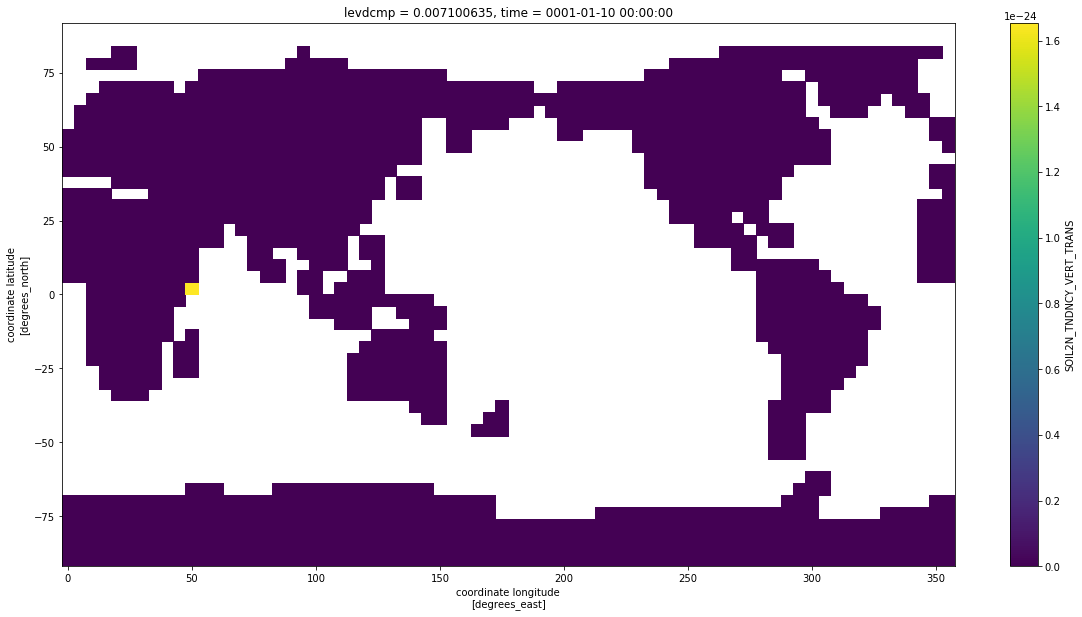

In [142]:
idx_ldcmp = 0
stvt_diff.isel(time=9,levdcmp=idx_ldcmp).plot(figsize=(20,10))